<h1 style="color:black" align="center">1.5 Описательные статистики</h1>

## Step 2: Data preprocessing

In [6]:
df  <- mtcars

str(df)

df$vs  <- factor(df$vs, labels = c("V", "S"))
df$am  <- factor(df$am, labels = c("Auto", "Manual"))

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [14]:
sd(df$hp[df$cyl != 3 & df$am == "Auto"])
range(df$hp[df$cyl != 3 & df$am == "Auto"])

[1] 53.9082

[1]  62 245

## Step 5: Aggregation

In [15]:
head(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,V,Manual,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,V,Manual,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,S,Manual,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,S,Auto,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,V,Auto,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,S,Auto,3,1


In [16]:
mean_hp_vs  <- aggregate(x = df$hp, by = list(df$vs), FUN = mean)
mean_hp_vs

colnames(mean_hp_vs)  <- c("VS", "Mean HP")
mean_hp_vs

Group.1,x
V,189.72222
S,91.35714


VS,Mean HP
V,189.72222
S,91.35714


Более простой вариант

In [17]:
aggregate(hp ~ vs, df, mean)

vs,hp
V,189.72222
S,91.35714


Разбиение по двум переменным

In [18]:
aggregate(hp ~ vs + am, df, mean)

vs,am,hp
V,Auto,194.16667
S,Auto,102.14286
V,Manual,180.83333
S,Manual,80.57143


In [19]:
aggregate(x = df$hp, by = list(df$vs, df$am), FUN = mean)

Group.1,Group.2,x
V,Auto,194.16667
S,Auto,102.14286
V,Manual,180.83333
S,Manual,80.57143


До этого мы использовали только одну количественную переменную для рассчета статистик. Исследуем все количественные переменные, за исключением факторых (8, 9)

In [20]:
aggregate(x = df[,-c(8,9)], by = list(df$am), FUN = median)

Group.1,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
Auto,17.3,8,275.8,175,3.15,3.52,17.82,3,3
Manual,22.8,4,120.3,109,4.08,2.32,17.02,4,2


Рассчитаем стандартное отклонение по двум количественным переменным, разбив количественные переменные с учетом типа количества передач и типа двигателя.

In [28]:
aggregate(df[,c(1,3)], by = list(df$am, df$vs), FUN = sd)

Group.1,Group.2,mpg,disp
Auto,V,2.774396,71.82349
Manual,V,4.008865,95.23362
Auto,S,2.471071,49.13072
Manual,S,4.757701,18.80213


В виде формулы:

In [29]:
aggregate(cbind(mpg, disp) ~ am + vs, df, sd)

am,vs,mpg,disp
Auto,V,2.774396,71.82349
Manual,V,4.008865,95.23362
Auto,S,2.471071,49.13072
Manual,S,4.757701,18.80213


In [30]:
aggregate(cbind(hp, disp) ~ am, df, sd)

am,hp,disp
Auto,53.90820,110.17165
Manual,84.06232,87.20399


## Step 8, 9: Library "psych"

In [33]:
library(psych)
library(ggplot2)

ERROR: Error in library(ggplot2): there is no package called 'ggplot2'


In [89]:
describe(x = df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mpg,1,32,20.090625,6.0269481,19.200,19.696154,5.4114900,10.400,33.900,23.500,0.6106550,-0.37276603,1.06542396
cyl,2,32,6.187500,1.7859216,6.000,6.230769,2.9652000,4.000,8.000,4.000,-0.1746119,-1.76211977,0.31570933
disp,3,32,230.721875,123.9386938,196.300,222.523077,140.4763500,71.100,472.000,400.900,0.3816570,-1.20721195,21.90947271
hp,4,32,146.687500,68.5628685,123.000,141.192308,77.0952000,52.000,335.000,283.000,0.7260237,-0.13555112,12.12031731
drat,5,32,3.596563,0.5346787,3.695,3.579231,0.7042350,2.760,4.930,2.170,0.2659039,-0.71470062,0.09451874
wt,6,32,3.217250,0.9784574,3.325,3.152692,0.7672455,1.513,5.424,3.911,0.4231465,-0.02271075,0.17296847
qsec,7,32,17.848750,1.7869432,17.710,17.827692,1.4158830,14.500,22.900,8.400,0.3690453,0.33511422,0.31588992
vs*,8,32,1.437500,0.5040161,1.000,1.423077,0.0000000,1.000,2.000,1.000,0.2402577,-2.00193762,0.08909831
am*,9,32,1.406250,0.4989909,1.000,1.384615,0.0000000,1.000,2.000,1.000,0.3640159,-1.92474143,0.08820997


In [90]:
descr  <- describe(x = df[,-c(8,9)])
descr

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mpg,1,32,20.090625,6.0269481,19.200,19.696154,5.4114900,10.400,33.900,23.500,0.6106550,-0.37276603,1.06542396
cyl,2,32,6.187500,1.7859216,6.000,6.230769,2.9652000,4.000,8.000,4.000,-0.1746119,-1.76211977,0.31570933
disp,3,32,230.721875,123.9386938,196.300,222.523077,140.4763500,71.100,472.000,400.900,0.3816570,-1.20721195,21.90947271
hp,4,32,146.687500,68.5628685,123.000,141.192308,77.0952000,52.000,335.000,283.000,0.7260237,-0.13555112,12.12031731
drat,5,32,3.596563,0.5346787,3.695,3.579231,0.7042350,2.760,4.930,2.170,0.2659039,-0.71470062,0.09451874
wt,6,32,3.217250,0.9784574,3.325,3.152692,0.7672455,1.513,5.424,3.911,0.4231465,-0.02271075,0.17296847
qsec,7,32,17.848750,1.7869432,17.710,17.827692,1.4158830,14.500,22.900,8.400,0.3690453,0.33511422,0.31588992
gear,8,32,3.687500,0.7378041,4.000,3.615385,1.4826000,3.000,5.000,2.000,0.5288545,-1.06975068,0.13042656
carb,9,32,2.812500,1.6152000,2.000,2.653846,1.4826000,1.000,8.000,7.000,1.0508738,1.25704307,0.28552971


**describeBy** Расчет описательных статистик по группам.

In [91]:
descr2  <- describeBy(x = df[,-c(8,9)], group = df$vs)
descr2$V
descr2$S


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mpg,1,18,16.616667,3.8606994,15.65,16.418750,2.9652000,10.40,26.000,15.600,0.4848484,-0.04617697,0.9099756
cyl,2,18,7.444444,1.1490263,8.00,7.625000,0.0000000,4.00,8.000,4.000,-1.7397531,1.94499359,0.2708281
disp,3,18,307.150000,106.7652193,311.00,308.525000,72.6474000,120.30,472.000,351.700,-0.2554760,-1.05725636,25.1648035
hp,4,18,189.722222,60.2815019,180.00,186.812500,48.1845000,91.00,335.000,244.000,0.4528693,-0.14510499,14.2084863
drat,5,18,3.392222,0.4739515,3.18,3.366875,0.3187590,2.76,4.430,1.670,0.7404542,-0.73394358,0.1117115
wt,6,18,3.688556,0.9040308,3.57,3.676875,0.5003775,2.14,5.424,3.284,0.5425973,-0.43390250,0.2130821
qsec,7,18,16.693889,1.0918960,17.02,16.749375,0.8450820,14.50,18.000,3.500,-0.7079236,-0.79946994,0.2573624
gear,8,18,3.555556,0.8555853,3.00,3.500000,0.0000000,3.00,5.000,2.000,0.9023599,-1.06814531,0.2016634
carb,9,18,3.611111,1.5392469,4.00,3.437500,1.4826000,2.00,8.000,6.000,1.1737397,1.33375017,0.3628040


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mpg,1,14,24.557143,5.3789782,22.8000,24.341667,6.004530,17.800,33.90,16.100,0.4055612,-1.40081941,1.4375924
cyl,2,14,4.571429,0.9376145,4.0000,4.500000,0.000000,4.000,6.00,2.000,0.8488760,-1.36173469,0.2505880
disp,3,14,132.457143,56.8932430,120.5500,127.108333,61.824420,71.100,258.00,186.900,0.8026718,-0.48933244,15.2053588
hp,4,14,91.357143,24.4244743,96.0000,92.000000,32.617200,52.000,123.00,71.000,-0.2399009,-1.60915113,6.5277153
drat,5,14,3.859286,0.5057890,3.9200,3.861667,0.259455,2.760,4.93,2.170,-0.2754065,0.46046904,0.1351778
wt,6,14,2.611286,0.7150100,2.6225,2.632083,0.948864,1.513,3.46,1.947,-0.1687530,-1.67700029,0.1910945
qsec,7,14,19.333571,1.3544150,19.1700,19.239167,1.022994,16.900,22.90,6.000,0.8584003,1.24936758,0.3619826
gear,8,14,3.857143,0.5345225,4.0000,3.833333,0.000000,3.000,5.00,2.000,-0.1718108,-0.08673469,0.1428571
carb,9,14,1.785714,1.0509023,1.5000,1.666667,0.741300,1.000,4.00,3.000,1.1303980,-0.02744161,0.2808654


Получим матрицу, а не list. Что удобно для просмотра всех данных, digits позволяет округлить данные.

In [ ]:
descr2  <- describeBy(x = df[,-c(8,9)], group = df$vs, mat = T, digits = 1)
descr2

`fast` более быстрый вариант описательных статистик.

In [ ]:
descr3  <- describeBy(x = df[,-c(8,9)], group = df$vs, mat = T, digits = 1, fast = T)
descr3

Укажем две группирующих переменных

In [92]:
describeBy(df$qsec, group = list(df$vs, df$am), digits = 1, fast = T)


 Descriptive statistics by group 
: V
: Auto
   vars  n  mean  sd   min max range   se
X1    1 12 17.14 0.8 15.41  18  2.59 0.23
------------------------------------------------------------ 
: S
: Auto
   vars n  mean   sd  min  max range   se
X1    1 7 19.97 1.46 18.3 22.9   4.6 0.55
------------------------------------------------------------ 
: V
: Manual
   vars n mean   sd  min   max range   se
X1    1 6 15.8 1.09 14.5 17.02  2.52 0.45
------------------------------------------------------------ 
: S
: Manual
   vars n mean   sd  min  max range   se
X1    1 7 18.7 0.95 16.9 19.9     3 0.36

## Step 10: NA values

In [93]:
sum(is.na(df))

[1] 0

In [ ]:
df$mpg[1:10] <- NA
sum(is.na(df))

Пставим мету, что необходимо игнорировать пропушенные значения

In [94]:
mean(df$mpg, na.rm = T)

[1] 20.09062

`aggregate` поумолчанию игнорирует пропуски.

In [95]:
aggregate(mpg ~ am, df, sd)

am,mpg
<fct>,<dbl>
Auto,3.833966
Manual,6.166504


`describe` изначально не учитывает пропуски в столбец.

`replace`

In [182]:
my_vector <- rnorm(30)

my_vector[sample(1:30, 10)] <- NA # на десять случайных позиций поместим 

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [184]:
replace(my_vector, is.na(my_vector), mean(my_vector, na.rm=T))

[1] -0.13633765 -0.01969510  0.11178406 -0.16709711 -0.60631327  0.11178406
 [7] -2.71341086  0.11178406  0.11178406  1.56830642  0.17342919  0.11178406
[13]  0.11178406 -0.38528845  0.11178406  0.11178406 -0.15863969  0.55057890
[19]  0.11178406 -0.92018797  1.77264890  1.46238839  0.95691368  0.47072826
[25]  0.15843995  0.31883650 -0.06379471  0.46386161  0.11178406 -0.48968574

<h1 style="color:black" align="center">1.6 Описательные статистики. Графики</h1>

## Step 1: Base graphs

In [186]:
df  <- mtcars
df$vs  <- factor(df$vs  , labels = c("V", "S"))
df$am  <- factor(df$am  , labels = c("Auto", "Manual"))

### `hist`

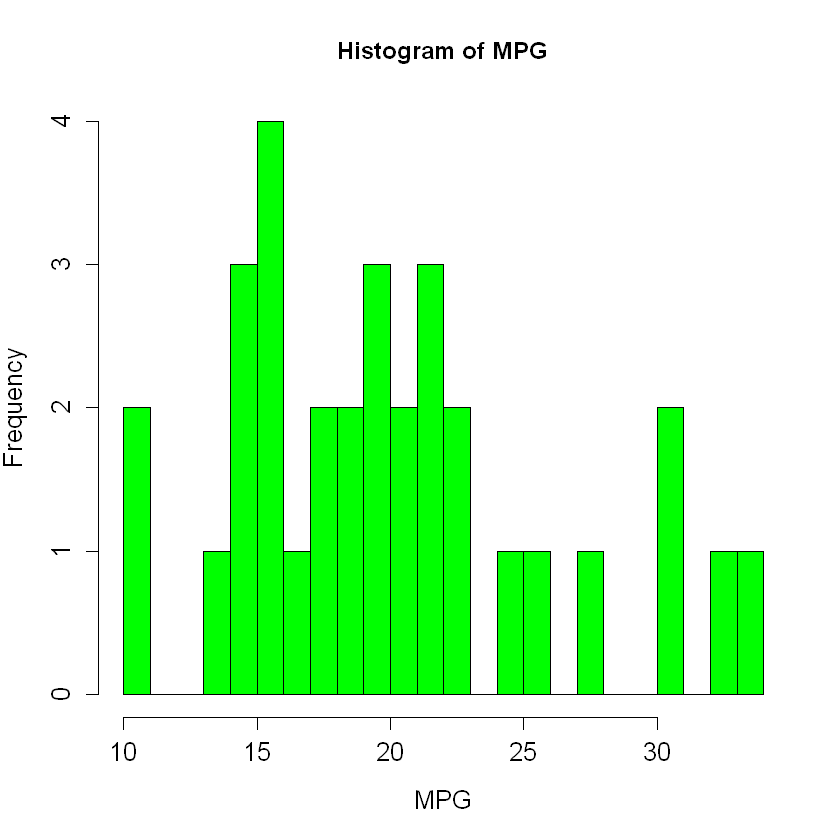

In [187]:
hist(df$mpg, breaks = 20, xlab = "MPG", main ="Histogram of MPG", 
     col = "green", cex.lab = 1.3, cex.axis = 1.3)

### `plot`

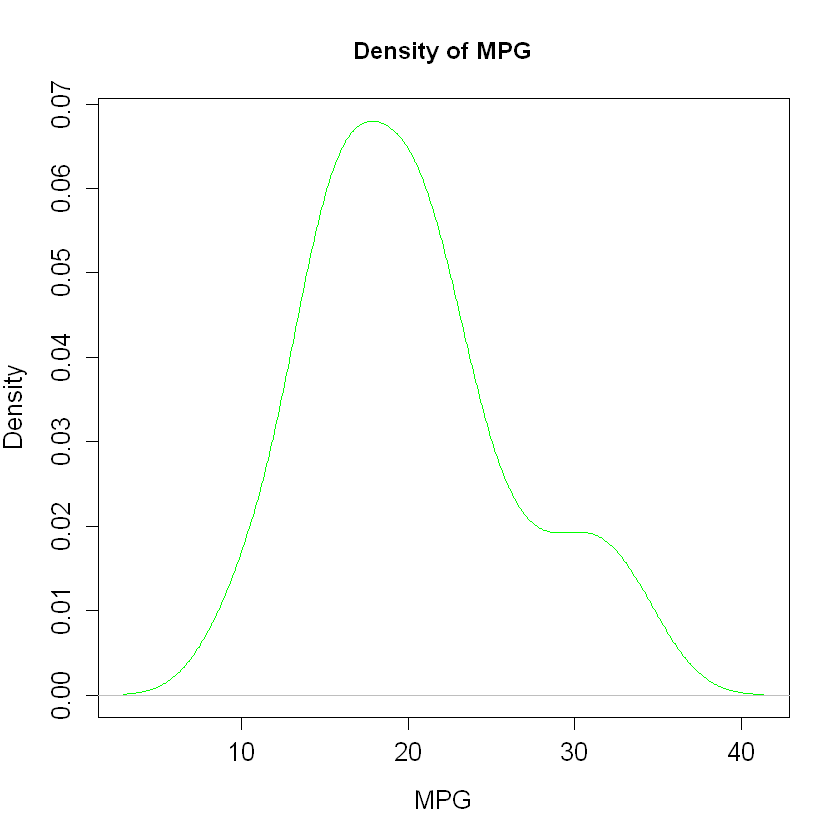

In [189]:
plot(density(df$mpg), xlab = "MPG", main ="Density of MPG", 
     col = "green", cex.lab = 1.3, cex.axis = 1.3)

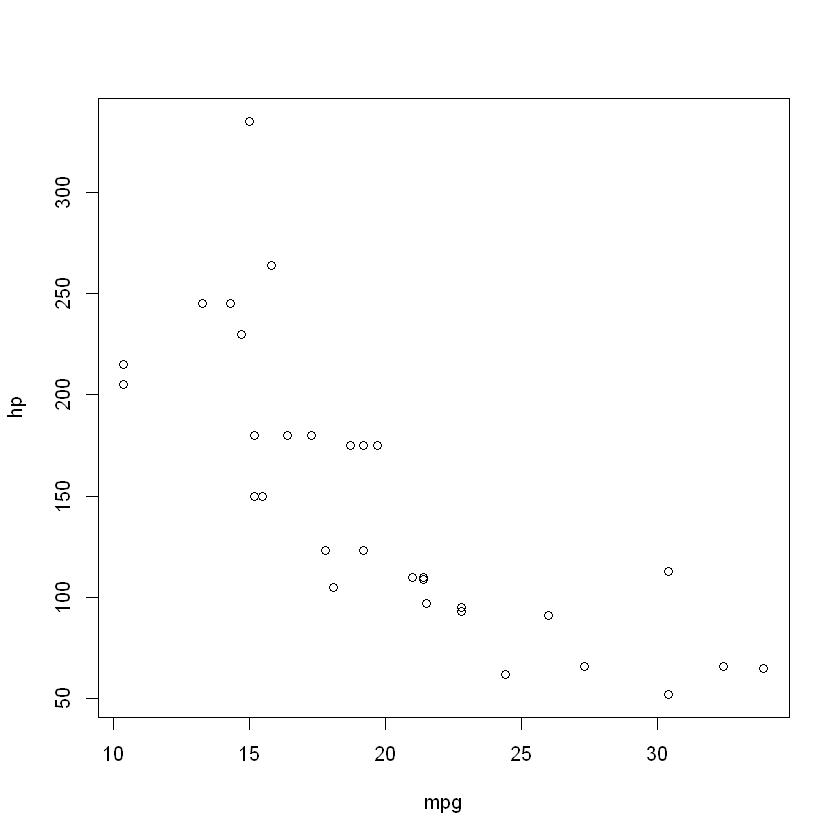

In [194]:
plot(~ mpg + hp, df)

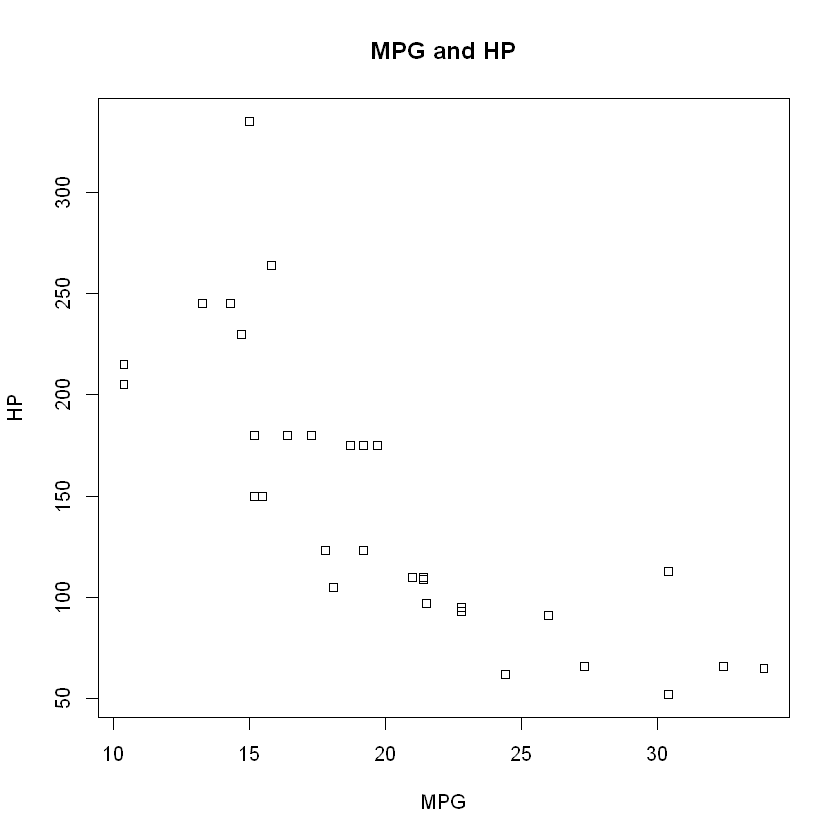

In [195]:
plot(df$mpg, df$hp, xlab = "MPG", ylab ="HP" , main ="MPG and HP", pch = 22)

### `boxplot`

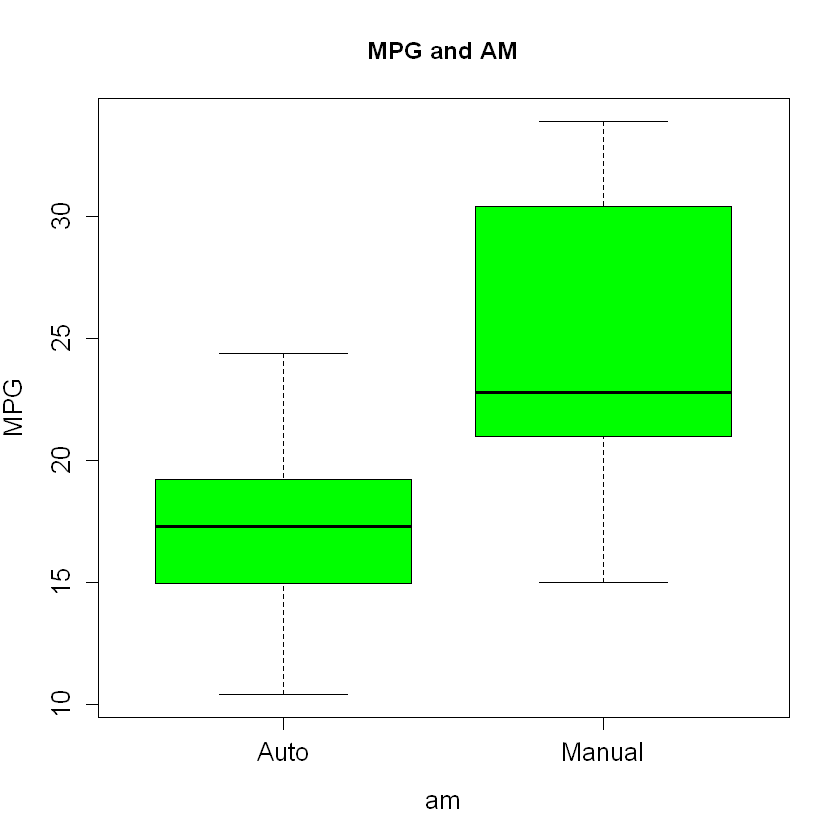

In [190]:
boxplot(mpg ~ am, df, ylab = "MPG", main ="MPG and AM", 
        col = "green", cex.lab = 1.3, cex.axis = 1.3)

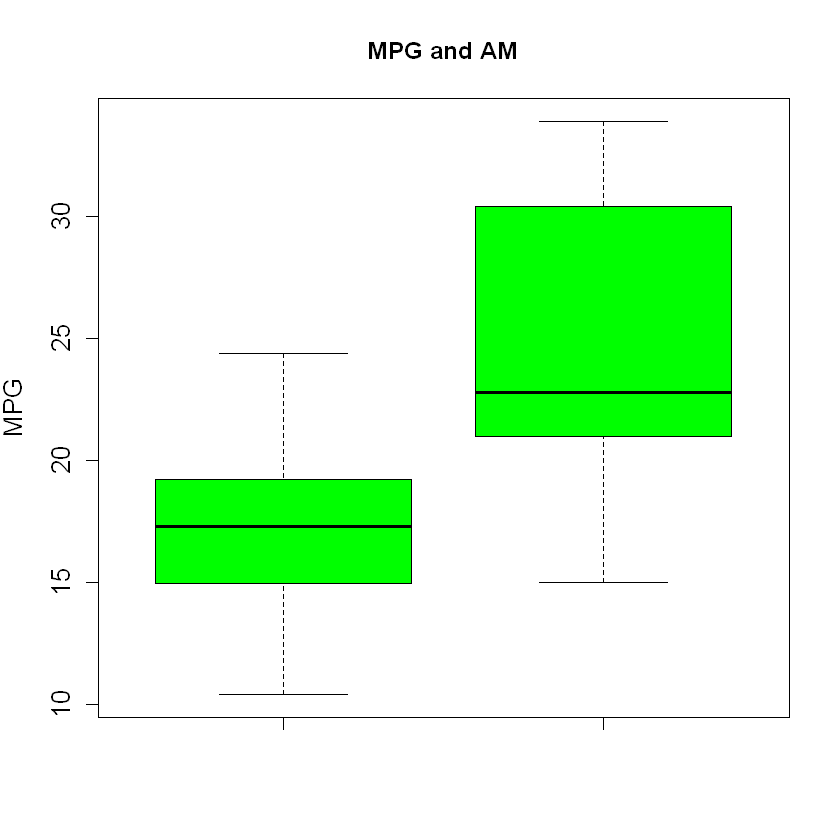

In [191]:
boxplot(df$mpg[df$am == "Auto"], df$mpg[df$am == "Manual"], ylab = "MPG", main ="MPG and AM", 
        col = "green", cex.lab = 1.3, cex.axis = 1.3)

## Step 2, 3: Library ggplot2

In [196]:
library(ggplot2)

`aes` - какие переменные должны быть отображены и каким образом. Дальше необходимо указать образ отображения.

### `geom_histogram`

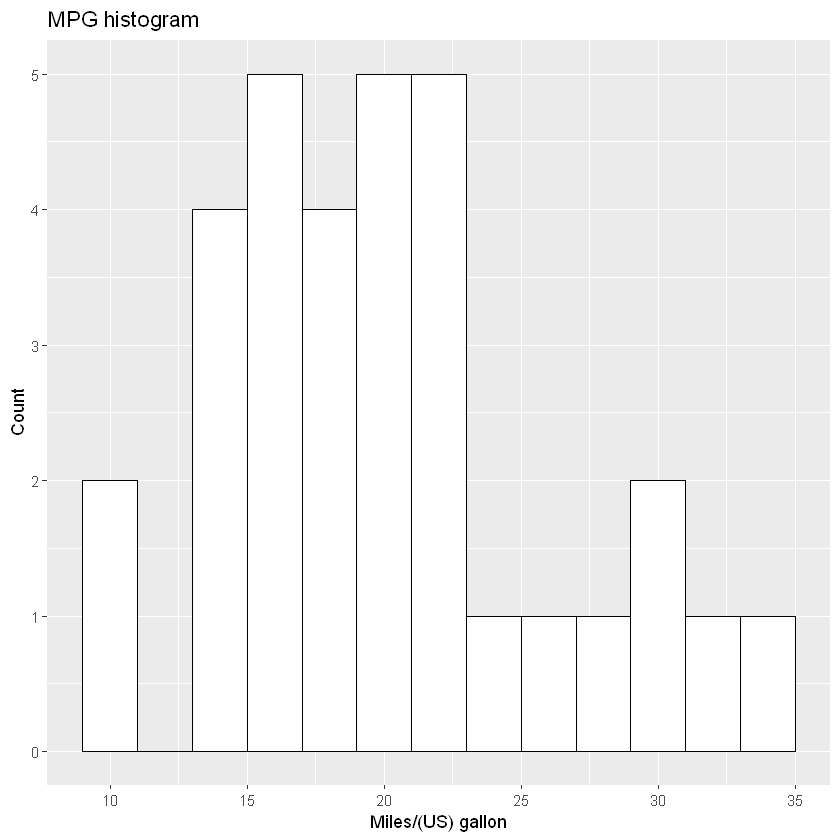

In [197]:
ggplot(df, aes(x = mpg))+
  geom_histogram(fill = "white", col = "black", binwidth = 2)+
  xlab("Miles/(US) gallon")+
  ylab("Count")+
  ggtitle("MPG histogram")

### `geom_dotplot`

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



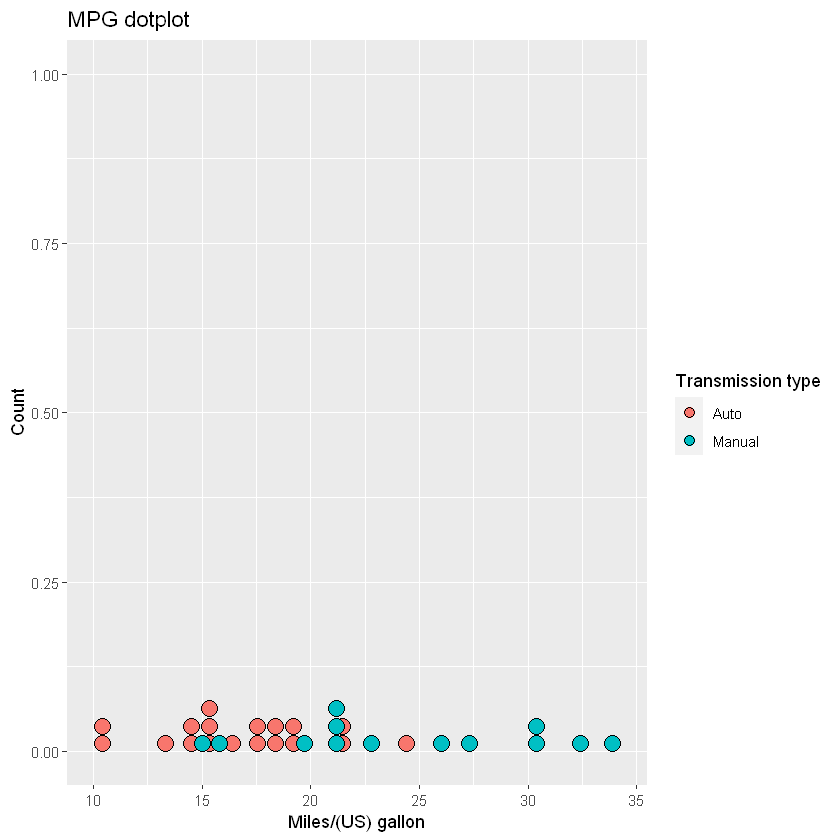

In [199]:
ggplot(df, aes(x = mpg, fill = am))+
  geom_dotplot()+
  xlab("Miles/(US) gallon")+
  ylab("Count")+
  scale_fill_discrete(name="Transmission type")+
  ggtitle("MPG dotplot")

### `geom_density`

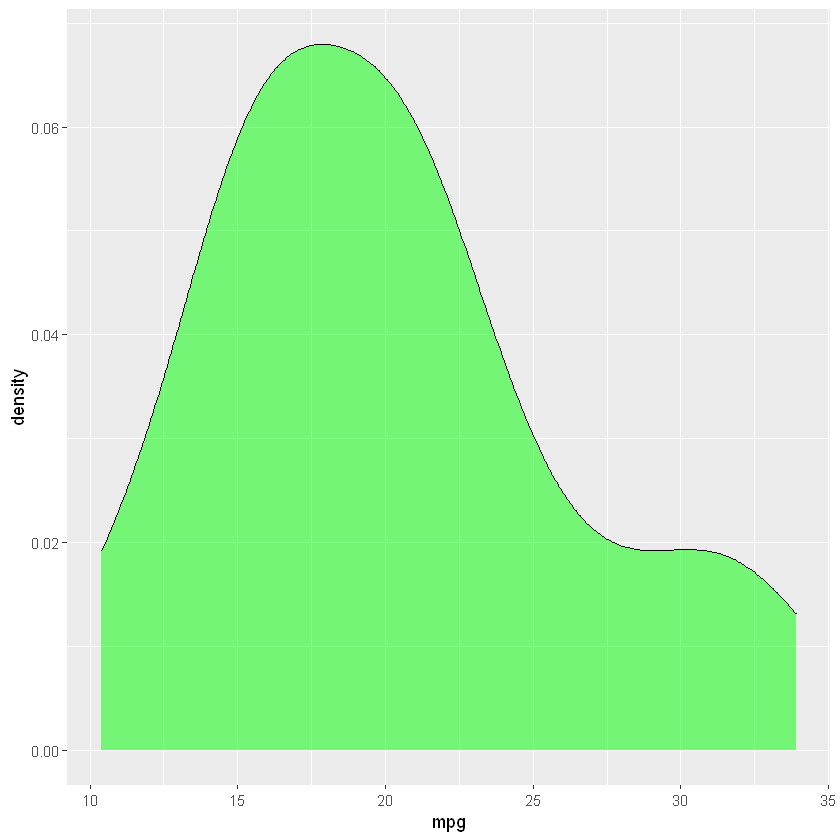

In [206]:
ggplot(df, aes(x = mpg))+
  geom_density(fill = "green", alpha = 0.5)

### Отображение нескольких переменных

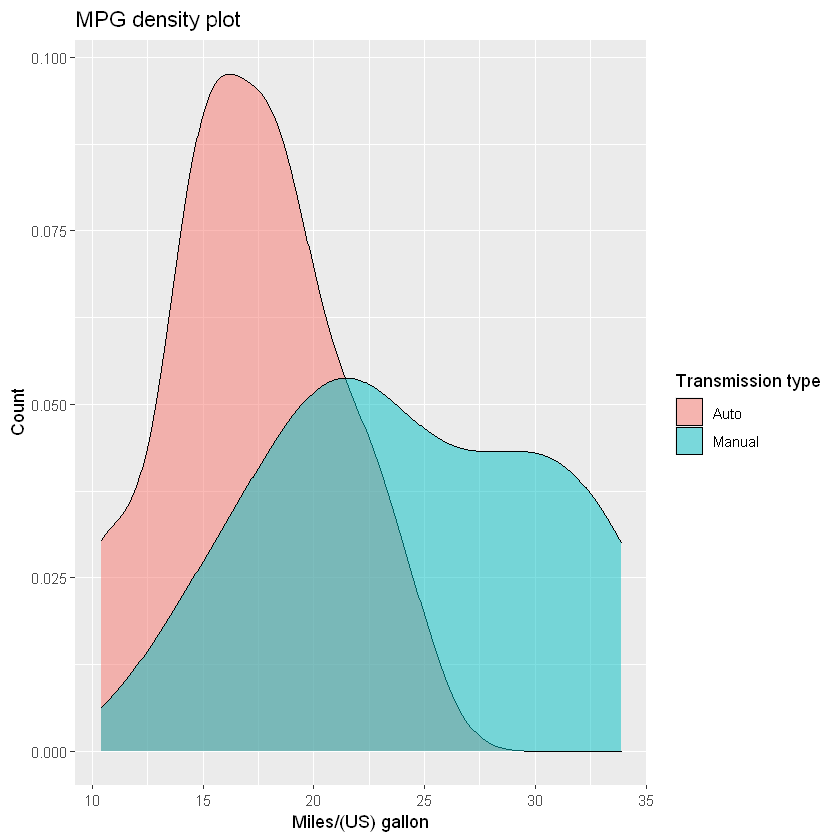

In [202]:
ggplot(df, aes(x = mpg, fill = am))+
  geom_density(alpha = 0.5)+
  xlab("Miles/(US) gallon")+
  ylab("Count")+
  scale_fill_discrete(name="Transmission type")+
  ggtitle("MPG density plot")

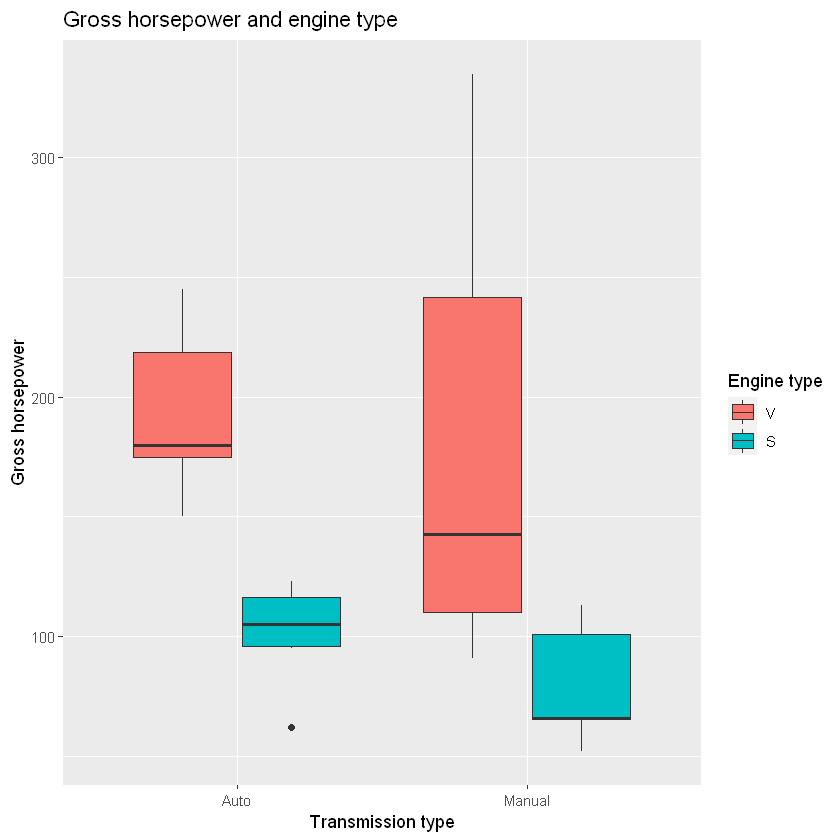

In [203]:
ggplot(df, aes(x = am, y = hp, fill = vs))+
  geom_boxplot()+
  xlab("Transmission type")+
  ylab("Gross horsepower")+
  scale_fill_discrete(name="Engine type")+
  ggtitle("Gross horsepower and engine type")

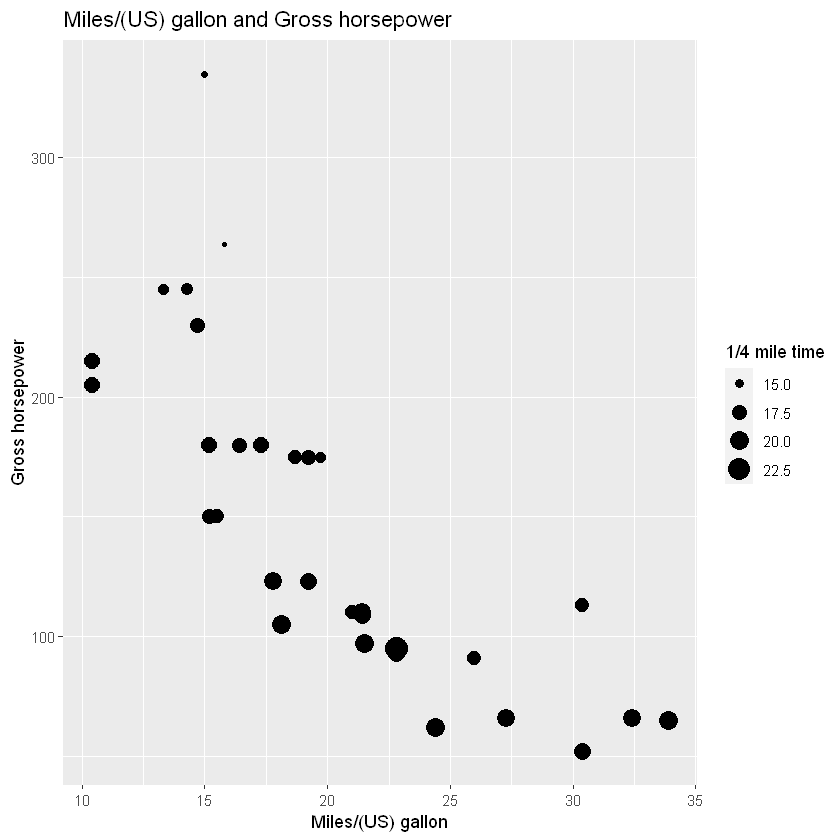

In [204]:
ggplot(df, aes(x = mpg, y = hp, size = qsec))+
  geom_point()+
  xlab("Miles/(US) gallon")+
  ylab("Gross horsepower")+
  scale_size_continuous(name="1/4 mile time")+
  ggtitle("Miles/(US) gallon and Gross horsepower")

### Сохранения графиков в переменные

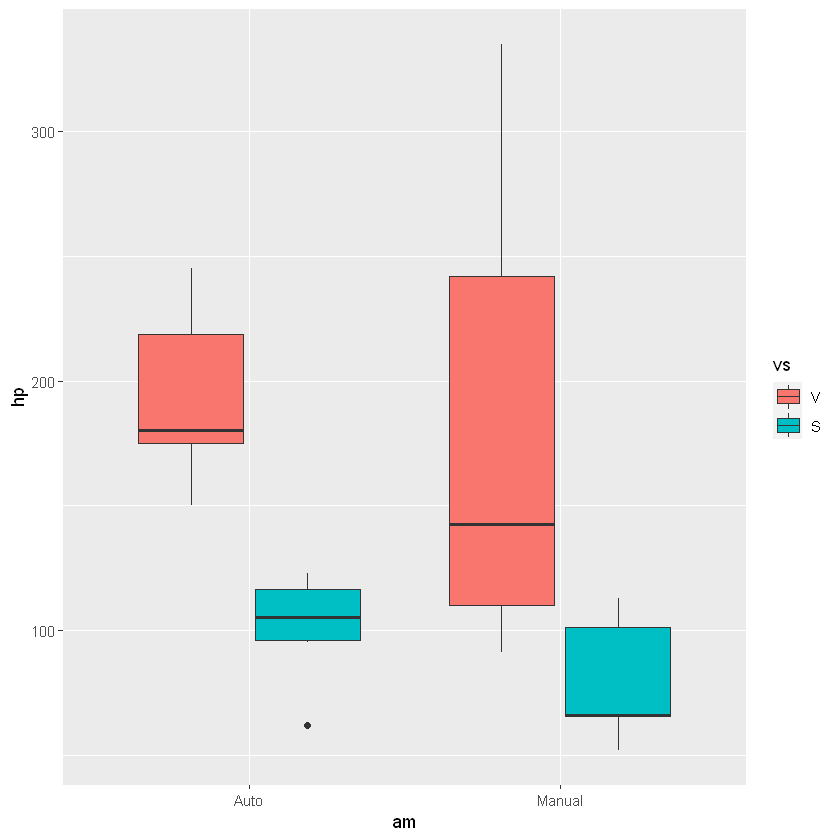

In [207]:
my_plot  <- ggplot(df, aes(x = mpg, y = hp, col = vs, size = qsec))+
  geom_point()

my_plot2  <- ggplot(df, aes(x = am, y = hp, fill = vs))

my_plot2 + geom_boxplot()

### Задание 1

При помощи функции ggplot() или boxplot() постройте график boxplot, используя встроенные в R данные airquality. По оси x отложите номер месяца, по оси y — значения переменной Ozone.

На графике boxplot отдельными точками отображаются наблюдения, отклоняющиеся от 1 или 3 квартиля больше чем на полтора межквартильных размаха. Сколько таких наблюдений присутствует в сентябре (месяц №9)?

Обратите внимание, что для корректного отображения графика ggplot ожидает факторную переменную по оси x.

In [209]:
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


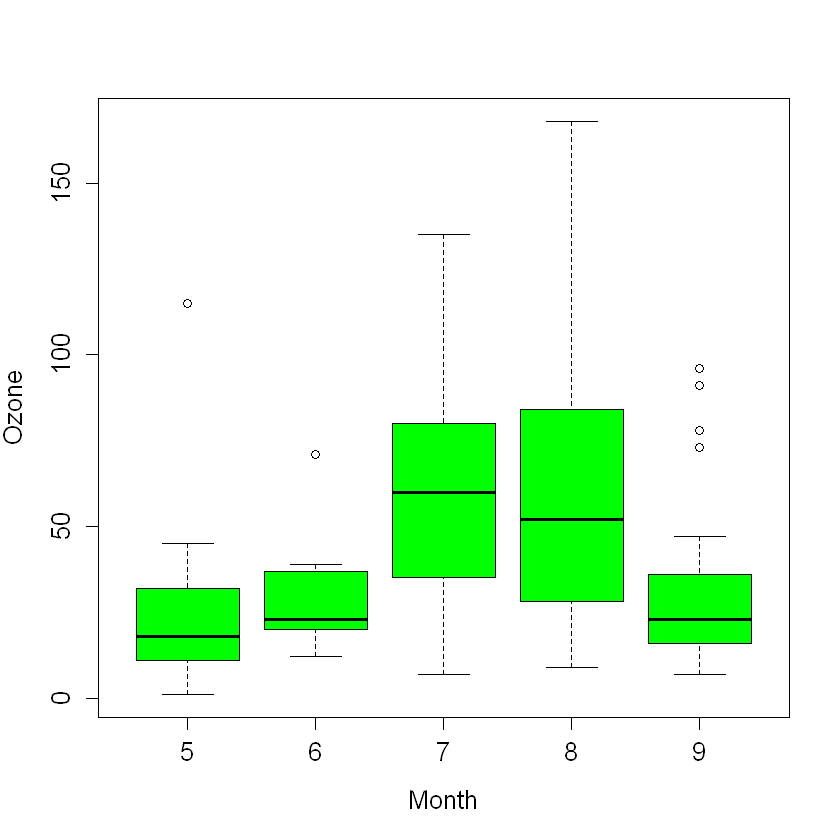

In [220]:
boxplot(Ozone ~ Month, airquality, col = "green", cex.lab = 1.3, cex.axis = 1.3)

### Задание 2

Используем знакомые нам данные mtcars. 

Нужно построить scatterplot с помощью ggplot из ggplot2, по оси x которого будет mpg, по оси y - disp, а цветом отобразить переменную (hp).

Полученный график нужно сохранить в переменную plot1. Таким образом в ответе должен быть скрипт:

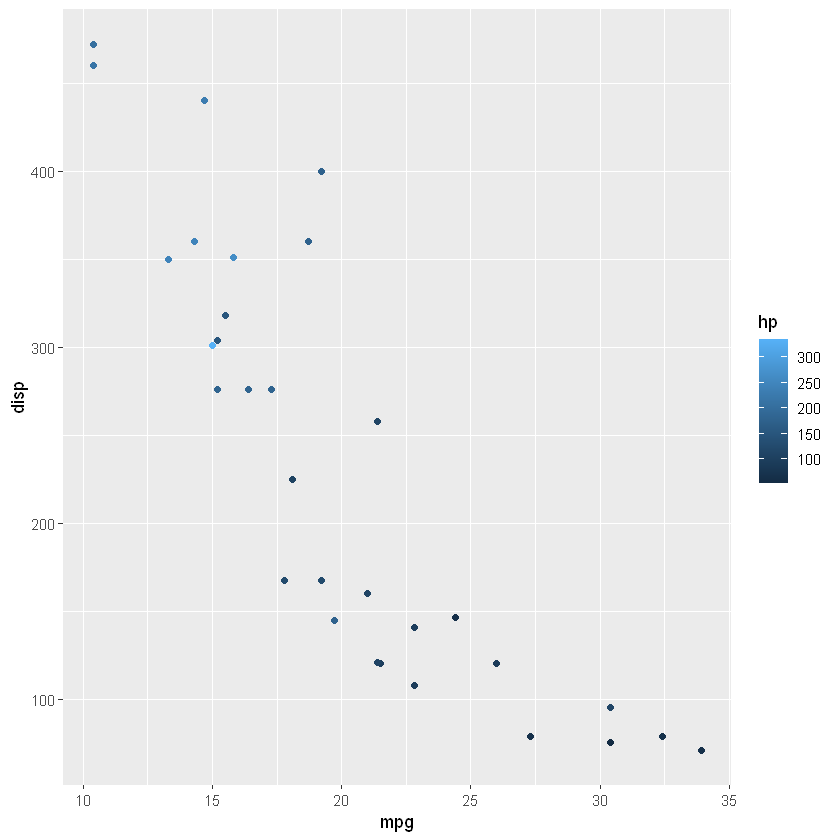

In [237]:
plot1 <- ggplot(mtcars, aes(x=mpg, y=disp, col=hp))+
 geom_point()
plot1

### Задание 4

Scatterplot (диаграмма рассеивания), где по оси X будет отложена переменная Sepal.Length,  по оси Y переменная  Sepal.Width. За цвет точек будет отвечать переменная  Species, а за размер точек переменная Petal.Length.

In [239]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


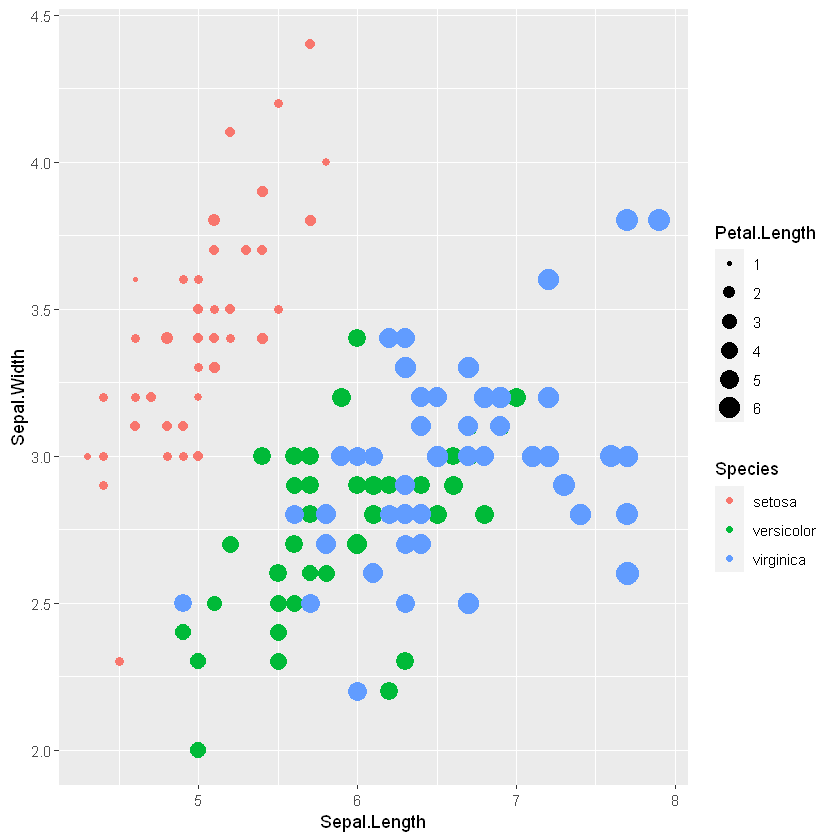

In [256]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, col = Species)) +

 geom_point(aes(size = Petal.Length))

<h1 style="color:black" align="center">1.7 Сохранение результатов</h1>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mpg,1,32,20.090625,6.0269481,19.200,19.696154,5.4114900,10.400,33.900,23.500,0.6106550,-0.37276603,1.06542396
cyl,2,32,6.187500,1.7859216,6.000,6.230769,2.9652000,4.000,8.000,4.000,-0.1746119,-1.76211977,0.31570933
disp,3,32,230.721875,123.9386938,196.300,222.523077,140.4763500,71.100,472.000,400.900,0.3816570,-1.20721195,21.90947271
hp,4,32,146.687500,68.5628685,123.000,141.192308,77.0952000,52.000,335.000,283.000,0.7260237,-0.13555112,12.12031731
drat,5,32,3.596563,0.5346787,3.695,3.579231,0.7042350,2.760,4.930,2.170,0.2659039,-0.71470062,0.09451874
wt,6,32,3.217250,0.9784574,3.325,3.152692,0.7672455,1.513,5.424,3.911,0.4231465,-0.02271075,0.17296847
qsec,7,32,17.848750,1.7869432,17.710,17.827692,1.4158830,14.500,22.900,8.400,0.3690453,0.33511422,0.31588992
gear,8,32,3.687500,0.7378041,4.000,3.615385,1.4826000,3.000,5.000,2.000,0.5288545,-1.06975068,0.13042656
carb,9,32,2.812500,1.6152000,2.000,2.653846,1.4826000,1.000,8.000,7.000,1.0508738,1.25704307,0.28552971


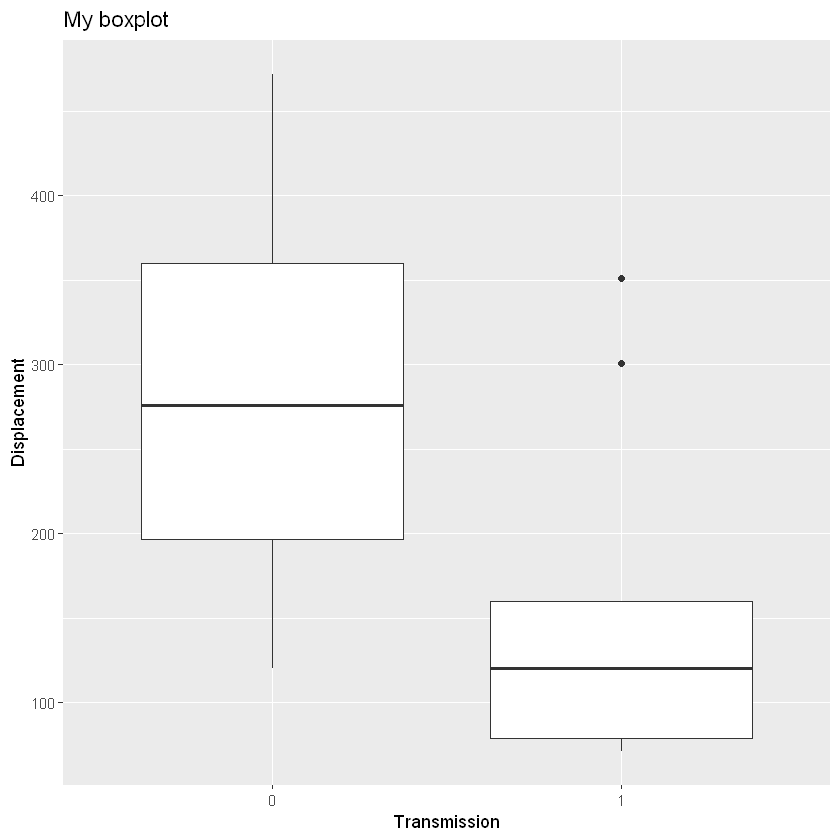

In [259]:
df  <- mtcars

mean_mpg  <- mean(df$mpg)

descr_df  <- describe(df[,-c(8,9)])

my_boxplot  <- ggplot(df, aes(x = factor(am), y = disp))+
  geom_boxplot()+
  xlab("Transmission")+
  ylab("Displacement")+
  ggtitle("My boxplot")
  
descr_df
my_boxplot

```R
write.csv(df, "df.csv")
write.csv(descr_df, "descr_df.csv")

my_mean  <- mean(10^6 : 10^7)
save(my_mean, file = "my_mean.RData")
```

